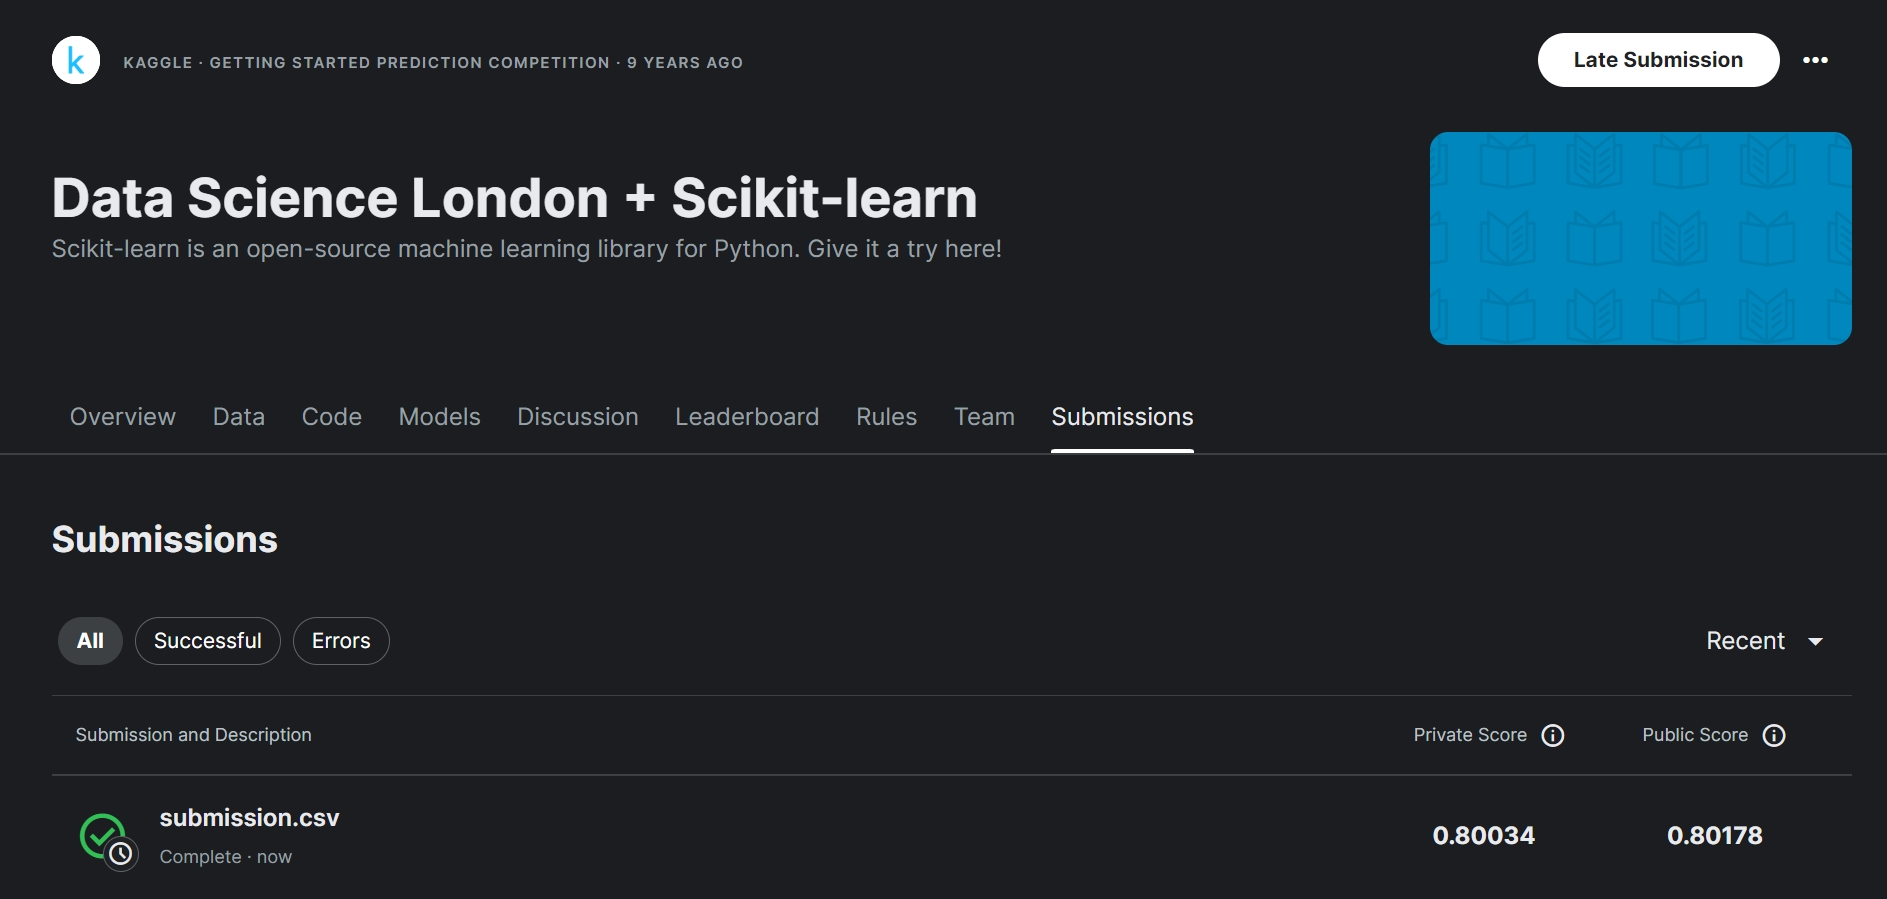

In [1]:
import os
import warnings

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


kaggle/input/data-science-london-scikit-learn/test.csv
kaggle/input/data-science-london-scikit-learn/trainLabels.csv
kaggle/input/data-science-london-scikit-learn/train.csv


In [2]:
## import datasets
train_data = pd.read_csv('kaggle/input/data-science-london-scikit-learn/train.csv', header=None)
test_data = pd.read_csv('kaggle/input/data-science-london-scikit-learn/test.csv', header=None)
labels = pd.read_csv('kaggle/input/data-science-london-scikit-learn/trainLabels.csv', header=None)

In [3]:
## 統計資訊
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [4]:
dtc = DecisionTreeClassifier()
dtc.fit(train_data, labels.values.ravel())
dtc_out = dtc.predict(test_data)

lg = LogisticRegression()
lg.fit(train_data, labels.values.ravel())
lg_out = lg.predict(test_data)

print('LogisticRegression and DecisionTreeClassifier: ', accuracy_score(lg_out, dtc_out))


LogisticRegression and DecisionTreeClassifier:  0.7647777777777778


In [5]:
svc = SVC()
svc.fit(train_data, labels.values.ravel())
svc_out = svc.predict(test_data)

print('SVC and LogisticRegression', accuracy_score(lg_out, svc_out))
print('SVC and DecisionTreeClassifier', accuracy_score(dtc_out, svc_out))

SVC and LogisticRegression 0.8702222222222222
SVC and DecisionTreeClassifier 0.7998888888888889


In [6]:
solution = pd.DataFrame({'Id': range(1, len(lg_out) + 1), 'Solution': lg_out})
solution.to_csv('submission.csv', index=False)